<img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº2 - "Algoritmo para calcular la DFT"

### Gabriel Cruz

### Enunciado

Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

\begin{equation}
X_k = \sum_{n=0}^{N-1} x_n e^{-j \cdot 2 \pi \cdot \frac{k n}{N}}
\end{equation}

XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.

## Función realizada 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%% algorimo de DFT

def mi_funcion_DFT( xx ):
    
    N = len(xx)
    #Pongo en 0+0*j en todo el vector
    X = [0+0j] * N
    for k in range(N):
        for n in range(N):
            
            X[k] += xx[n] * np.exp(-2j * np.pi * k * n/N)
    
    return X

Vamos a probar el funcionamiento de esta funcion. Para esto vamos a necesitar del generador de señales realizado el TP anterior.

In [2]:
#%% Generador de señales senoidales

def     mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    
    w = 2 * np.pi * ff
    tt = np.arange(0, nn/fs, 1/fs)
    xx = dc + vmax * np.sin(tt * w + ph )
    return tt,xx

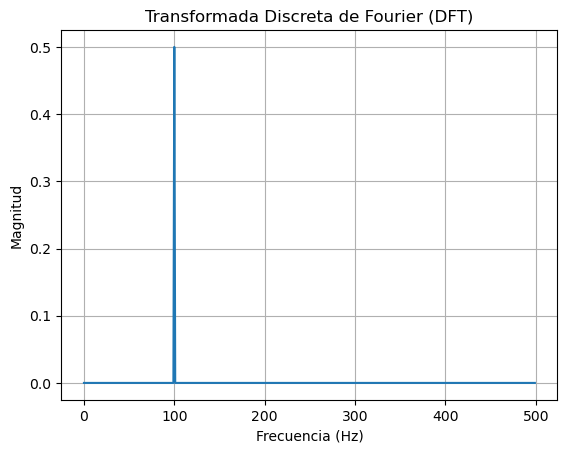

In [3]:
#Creo una señales senoidales

tt, xx = mi_funcion_sen(1,0,100,0, 1000, 1000)

# Realizo la DFT
  
XX = mi_funcion_DFT(xx)

# Para graficarlo 
    
N = len(XX)

dt = tt[1] - tt[0]

fs= 1/dt

freqs = np.arange(0, N, fs/N)

#Lo divido por N porque sino me da la amplitud multiplicada por N 
modulo_XX = np.abs(XX)/N

#Solo ploteo la mitad positiva del espectro.
plt.plot(freqs[:N//2], modulo_XX[:N//2]) 
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada Discreta de Fourier (DFT)')
plt.grid(True)
plt.show()

En grafico de arriba se puede observar el DFT de una seno de amplitud 1V y 100Hz. Solo se esta graficando la parte positiva del espectro.

Ahora vamos a ver las dos partes del espectro tanto la positiva como la negativa.

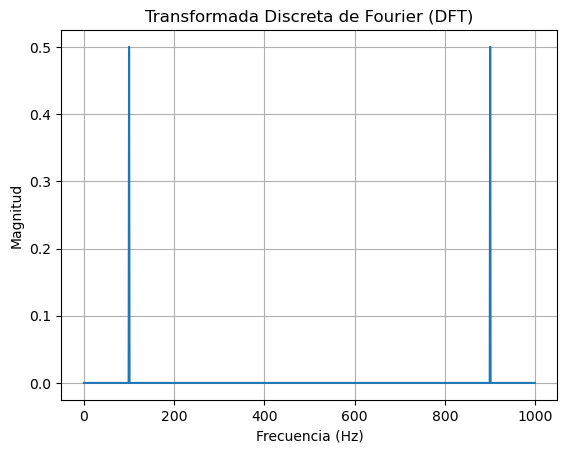

In [4]:
plt.plot(freqs, modulo_XX) 
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada Discreta de Fourier (DFT)')
plt.grid(True)
plt.show()

En el grafico de arriba podemos observar como se grafico el espectro completo. Vemos que de 0 a 499 nos estaria graficando la parte positiva y desde 500 a 1000 la parte negativa y el cero de la parte negativa seria el 1000. Vemos que los pulsos estan en 100Hz y en 900Hz que seria -100Hz.

Ahora voy a probar con la suma de tres senoidal.

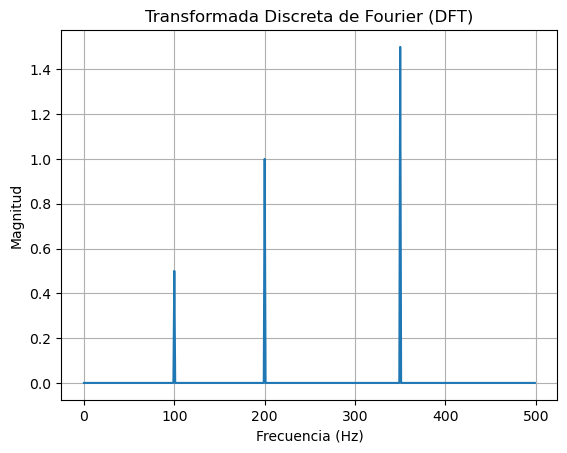

In [5]:
#Creo una señales senoidales

tt, xx = mi_funcion_sen(1,0,100,0, 1000, 1000)
yy, pp = mi_funcion_sen(2,0,200,0, 1000, 1000)
zz, oo = mi_funcion_sen(3,0,350,0, 1000, 1000)
# Realizo la DFT
  
XX = mi_funcion_DFT(xx+pp+oo)

# Para graficarlo 
    
N = len(XX)

dt = tt[1] - tt[0]

fs= 1/dt

freqs = np.arange(0, N, fs/N)

#Lo divido por N porque sino me da la amplitud multiplicada por N 
modulo_XX = np.abs(XX)/N

#Solo ploteo la mitad positiva del espectro.
plt.plot(freqs[:N//2], modulo_XX[:N//2]) 
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada Discreta de Fourier (DFT)')
plt.grid(True)
plt.show()


En el grafico de arriba podemos obsevar el DFT de 3 senoidales con frecuencias 100Hz, 200Hz y 350Hz y con distitas amplitudes. 

## Función numpy.fft.fft

Ahora vamos a comparalo con la funcion de numpy.fft.fft

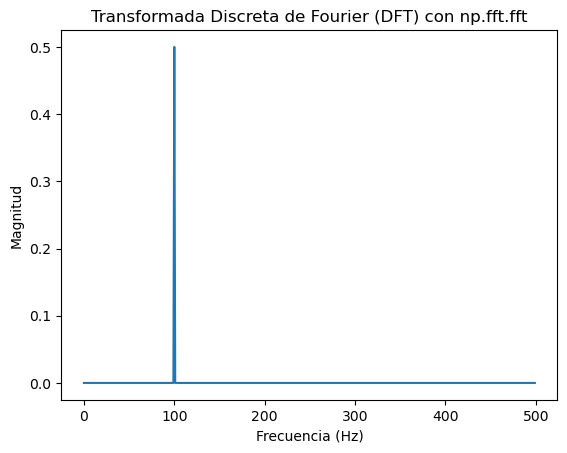

In [6]:
#%% Con numpy.fft.fft

sp = np.fft.fft(xx)

plt.plot(freqs[:N//2], np.abs(sp)[:N//2]/N) 
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada Discreta de Fourier (DFT) con np.fft.fft')
plt.show()

En el grafico de arriba podemos observar la senoidal de 100Hz con la funcion de numpy.fft.ftt que nos da igual a la funcion realizada al principio.

## DFT de una señal aleatoria

En este caso vamos a usar Ruido Uniforme de varianza σ² = 4 como señal aleatoria.


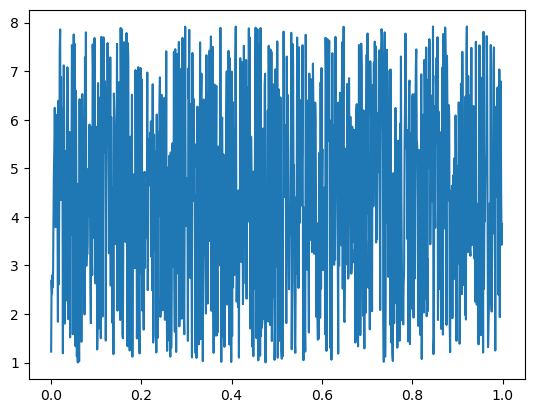

In [7]:
#%% Ruido con varianza 4 
#varianza = (b - a)^2 / 12

a = 1
b = a + 6.928

aux = (b - a) * np.random.random_sample(N) + a

plt.plot(tt,aux) 
plt.show()

Ahora su DFT.

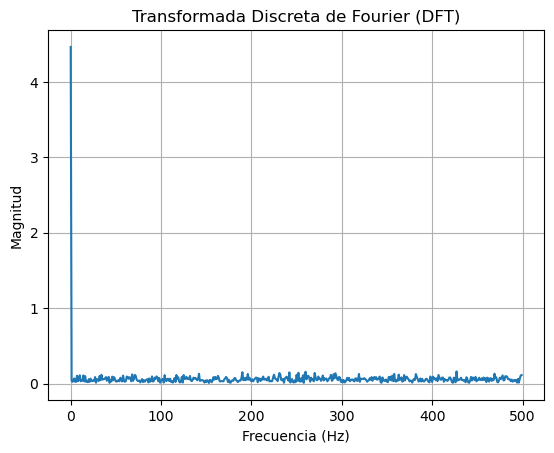

In [8]:
#%% DFT del ruido

XX = mi_funcion_DFT(aux)

# Para graficarlo 
    
N = len(XX)

dt = tt[1] - tt[0]

fs= 1/dt

freqs = np.arange(0, N, fs/N)

#Lo divido por N porque sino me da la amplitud multiplicada por N 
modulo_XX = np.abs(XX)/N

#Solo ploteo la mitad positiva del espectro.
plt.plot(freqs[:N//2], modulo_XX[:N//2]) 
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Transformada Discreta de Fourier (DFT)')
plt.grid(True)
plt.show()

Podemos observar en el grafico de arriba como es el espectro del ruido uniforme. El pico en 0 Hz nos indica que tiene una componente de continua.